# Modeling
Goal: Build two to three different models and identify the best one. 

STEPS:

● Fit your models with a training dataset

● Review model outcomes — Iterate over additional models as needed

● Identify the final model that you think is the best model for this project

In [1]:
#imports
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA

In [2]:
#load data
path= '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/processed'
os.chdir(path) 
df = pd.read_csv('VacancyRate_Zillow_2014_2018')
df19_20 = pd.read_csv('VacancyRate_Zillow_2019_2020')

In [3]:
df

,Zipcode,RentPrice,Year,SizeRank,HomePrice,Vacancy_Rate%,State_AL,State_AR,State_AZ,State_CA,...,CountyName_Weber County,CountyName_Weld County,CountyName_Westchester County,CountyName_Will County,CountyName_Williamson County,CountyName_Wilson County,CountyName_Worcester County,CountyName_Yamhill County,CountyName_Yolo County,CountyName_York County
0,10025,3041.83,2014,0.0,968761.75,9.011810,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60657,1589.42,2014,1.0,450755.75,8.042922,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10023,3186.67,2014,2.0,1024543.17,19.964756,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,77494,1807.33,2014,3.0,322032.00,3.319292,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60614,1786.25,2014,4.0,580250.92,8.468203,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,2110,4643.58,2018,14752.0,1363870.08,17.412045,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16144,20004,2432.25,2018,15149.0,480942.83,21.036585,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16145,80951,1537.18,2018,15318.0,276619.83,1.084746,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16146,11964,20122.17,2018,17169.0,1000069.25,62.044105,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#add leading zeros to zipcode
df['Zipcode'] = df['Zipcode'].apply(lambda x: '{0:0>5}'.format(x))
df19_20['Zipcode'] = df19_20['Zipcode'].apply(lambda x: '{0:0>5}'.format(x))

In [5]:
#not currently using in this model
'''
#change National ('NATNL') zipcode to '99999' for later modeling
df.Zipcode.replace('NATNL', '99999', inplace=True)
df.Zipcode = df.Zipcode.astype('int')
df.dtypes
'''

"\n#change National ('NATNL') zipcode to '99999' for later modeling\ndf.Zipcode.replace('NATNL', '99999', inplace=True)\ndf.Zipcode = df.Zipcode.astype('int')\ndf.dtypes\n"

In [6]:
#define variable X, y
X = df.drop('Vacancy_Rate%', axis=1)
y = df['Vacancy_Rate%']

In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
#scale the data
#decided not to use scaled data because variables were in the similar format
#and scaled data provided -4 or so results for r^2 scores

scaler = StandardScaler()
#fit the scaler on the training set
scaler.fit(X_train)
#apply the scaling to both the train and test split
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

## Fit your models with a training dataset
Hint: Try a number of different models: you will want to compare their outputs in the
model evaluation stage. For example, if you’re writing a classification model, you should
implement both an entropy model and a Gini impurity model. For hyperparameter tuning,
think of methods like cross-validation . <https://scikit-learn.org/stable/modules/cross_validation.html>

#### Initial Model: Train the model on the train split

In [9]:
lm = LinearRegression().fit(X_train, y_train)

In [10]:
#Make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_train)
y_te_pred = lm.predict(X_test)

In [11]:
#Assess model performance
# r^2 - train, test
r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
print('r2:', r2)

r2: (0.7687764566992208, 0.7445860460192686)


**This is markedly better performance than when using Dummy variable/mean for R^2 (see preprocessing notebook):**

Dummy R2 = (0.0, -0.001031839268772039)

In [12]:
#MAE - train, test
mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
print('mae:', mae)

mae: (2.1716630434596307, 2.233852376239224)


In [13]:
mae: (2.171663043231668, 2.233852376189822)
# MSE - train, test
mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
print('mse:', mse) 

mse: (13.267996939308786, 12.45054984358535)


**This is markedly better performance than when using Dummy variable/mean for R^2 (see earlier):**

Dummy -

MAEs: 5.14329246126588 4.923647741748382

MSEs: 57.38168678632161 48.79685160338582

**MSE still high (possibly due to this being a large data set**

In [14]:
#calculate adjusted r2 for training set
#12918 = n , 1754 = p (X_train + y_train)
Adj_r2Train = 1-(1-r2_score(y_train, y_tr_pred))*(12918-1)/(12918-1754-1)
Adj_r2Train

0.7324451752381829

In [15]:
#calculate adjusted r2 for test set
#12918 = n , 1754 = p (X_train + y_train)
Adj_r2Test = 1-(1-r2_score(y_test, y_te_pred))*(3230-1)/(3230-1754-1)
Adj_r2Test

0.44085989328557174

### Refining the Linear Model

In [16]:
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#use `f_regression` as its score function
pipe = make_pipeline(
    SelectKBest(f_regression),
    LinearRegression()
)

In [17]:
#fit the pipeline
pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=10,
                             score_func=<function f_regression at 0x1a25a92320>)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [18]:
#assess performance on the train and test set
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.27883752761048075, 0.2300784756205082)

In [19]:
#r2 and mae scores worse when k=10 (default)
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(4.4046477666324115, 4.286270367176132)

### Assessing performance using cross-validation

In [20]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) 

In [21]:
cv_scores = cv_results['test_score']
cv_scores

array([0.25841824, 0.25671345, 0.25626692, 0.3058555 , 0.25978588])

In [22]:
np.mean(cv_scores), np.std(cv_scores)

(0.2674079986614795, 0.01926457774692167)

###  Hyperparameter search using RandomizedSearchCV
Pulling the above together, we have:

a pipeline that:
- selects the k best features
- trains a linear regression model
- a technique (cross-validation) for estimating model performance

In [23]:
#get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [24]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [25]:
#use RandomizedSearcCV to optimize parameters
lr_rand_cv = RandomizedSearchCV(pipe, param_distributions=grid_params, cv=5, n_jobs=-1)

In [26]:
lr_rand_cv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('selectkbest',
                                              SelectKBest(k=10,
                                                          score_func=<function f_regression at 0x1a25a92320>)),
                                             ('linearregression',
                                              LinearRegression(copy_X=True,
                                                               fit_intercept=True,
                                                               n_jobs=None,
                                                               normalize=False))],
                                      verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
          

In [27]:
score_mean = lr_rand_cv.cv_results_['mean_test_score']
score_std = lr_rand_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_rand_cv.cv_results_['param_selectkbest__k']]

In [28]:
#Print the `best_params_` attribute of `lr_rand_cv`
lr_rand_cv.best_params_

{'selectkbest__k': 829}

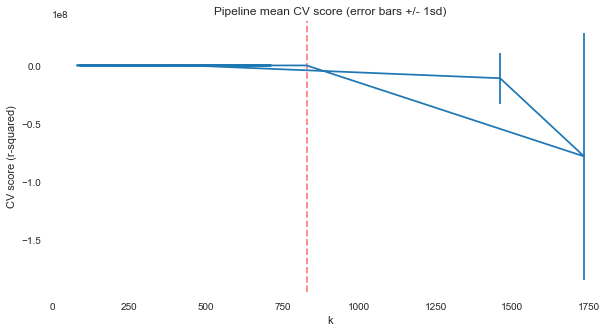

In [29]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_rand_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [30]:
#get the best estimator, then the named step 'selectkbest'
#for which you can its get_support() method for a logical mask of the features selected.
selected = lr_rand_cv.best_estimator_.named_steps.selectkbest.get_support()

In [31]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_rand_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

CountyName_Riverside County               1.202226e+08
CountyName_San Bernardino County          1.202226e+08
State_AZ                                  1.180264e+08
State_NV                                  7.116543e+07
CountyName_Ada County                     4.711539e+07
                                              ...     
Metro_Tucson                             -5.506673e+07
CountyName_Pima County                   -6.295963e+07
State_ID                                 -7.536517e+07
Metro_Phoenix-Mesa-Scottsdale            -1.047399e+08
Metro_Riverside-San Bernardino-Ontario   -1.202226e+08
Length: 829, dtype: float64

These results suggest that Counties, and States are the biggest positive features.
Wonder why this may be? Further exploration of these variables is needed.. What about the negative features??

## Review model outcomes — Iterate over additional models as needed 
Hint: you may want to use standard model evaluation metrics such as accuracy, recall,
precision, and F1.

### Random Forest Model

In [32]:
#Define a pipeline comprising the steps:
#and then RandomForestRegressor()
RF_pipe = make_pipeline(RandomForestRegressor())

In [33]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [34]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.8970227 , 0.91052103, 0.88112378, 0.90797764, 0.90789315])

In [35]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9009076605019206, 0.010933375112900053)

#### Hyperparameter search using RandomizedSearchCV

In [36]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000]}

In [37]:
#Call `RandomizedSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores
rf_rand_cv = RandomizedSearchCV(RF_pipe, param_distributions=grid_params, cv=5, n_jobs=-1)

In [38]:
#call the `RandomizdSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
rf_rand_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomforestregressor',
                                              RandomForestRegressor(bootstrap=True,
                                                                    ccp_alpha=0.0,
                                                                    criterion='mse',
                                                                    max_depth=None,
                                                                    max_features='auto',
                                                                    max_leaf_nodes=None,
                                                                    max_samples=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                

In [39]:
#Print the best params (`best_params_` attribute) from the grid search
rf_rand_cv.best_params_

{'randomforestregressor__n_estimators': 615}

In [40]:
rf_best_cv_results = cross_validate(rf_rand_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.90039092, 0.91330339, 0.88434758, 0.90735744, 0.91460199])

In [41]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9040002648531764, 0.011040567539327412)

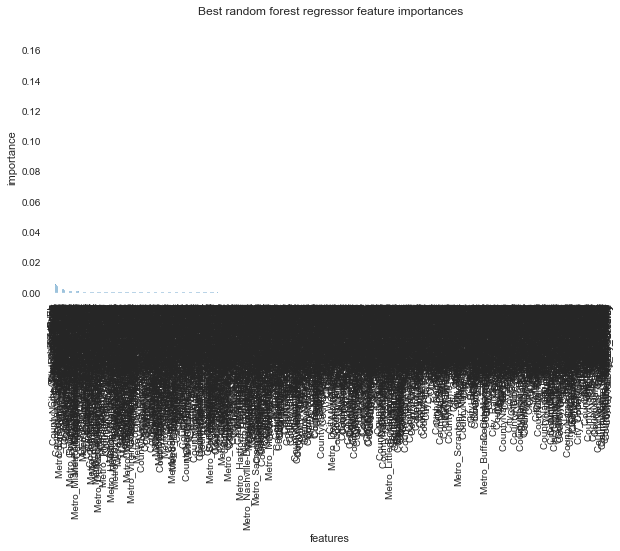

In [42]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_rand_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

## Identify the final model that you think is the best model for this project
Hint: the most powerful model isn’t always the best one to use. Other considerations
include computational complexity, scalability, and maintenance costs.


### Linear regression model performance

In [44]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_rand_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [45]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(2.721863024637768, 0.06847383890420836)

In [46]:
mean_absolute_error(y_test, lr_rand_cv.best_estimator_.predict(X_test))

2.7264991068102455

### Random forest regression model performance

In [47]:
rf_neg_mae = cross_validate(rf_rand_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [48]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(1.52195694813689, 0.025506237478906745)

In [49]:
### TRY THIS aBOVE WITH ROOT MEAN SQUARED ERROR ‘neg_root_mean_squared_error’
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

#### Conclusion
seems like random forest (mean CV score - 0.9008999891811129, std - 0.01127433625724135) is far superior in performance than the linear model (mean CV score - 0.2674079986614795, std - 0.01926457774692167). BUT MAYBE NEED TO RERUN LINEAR REGRESSION WITH K OPTIMIZED at 829? 

## Data quantity assessment 
check if we need to undertake further data collection. Would more data be useful? 

Assess this trade off by seeing how performance varies with differing data set sizes. 
The learning_curve function does this conveniently.

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

## Save best model object from pipeline

In [ ]:
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()
    
modelpath = '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/models'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
skimodel_path = os.path.join(modelpath, 'vacancy_rate_model.pkl')
if not os.path.exists(skimodel_path):
    with open(skimodel_path, 'wb') as f:
        pickle.dump(best_model, f)

## Reflection
Review the following questions and apply them to your analysis:
    
● Does my data involve a time series or forecasting? If so, am I splitting the train and test data appropriately?

● Is my response variable continuous or categorical? 

In [ ]:
#follow along with timeseries datacamp to do..
'''
    #use information criterioin to choose best model
    #forecast temperature over the next 2 years
    '''


Random forest
(0.9008999891811129, 0.01127433625724135)